Objective : 
- read Sunspot number data file from a server or a directory
- generate an array of data
- Detect peak in sunspots
- Plot Sunspot number, peak, and acceleration data and the projected arrival events at Earth

## Data acquisition ## 

realtime_SSN:[ 62  68  67 100  70] with len:5
longterm_SSN:['  -1' '  -1' '  -1' ..., '  28' '  37' '  46'] with len:72378
SSN:['  -1' '  -1' '  -1' ..., '67' '100' '70'] with len:72383
timestamp:['1818.001' '1818.004' '1818.007' ..., '2016.171' '2016.173' '2016.176'] with len:72383


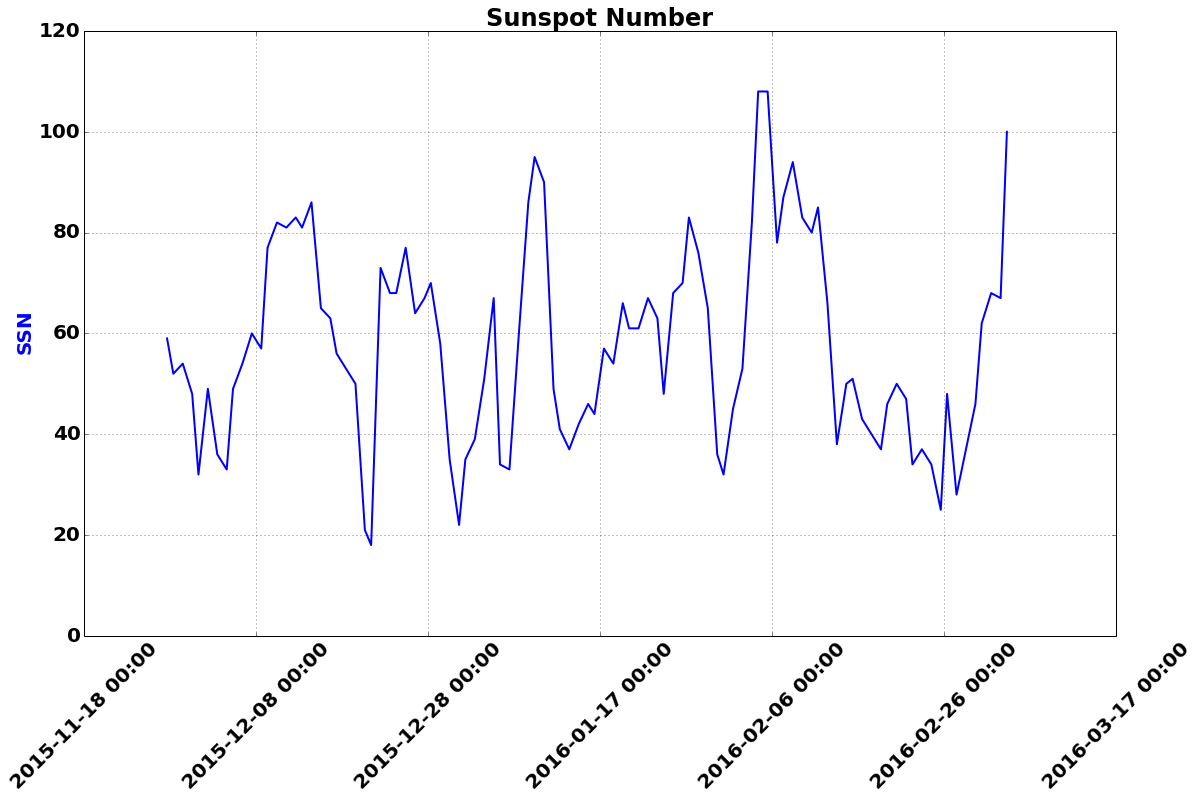

In [163]:
import urllib 
from datetime import datetime, timedelta

# Data acquisition -------------------------------------------
urllib.urlretrieve('http://www.sidc.be/silso/DATA/EISN/EISN_current.txt', 'realtime.txt')
urllib.urlretrieve('http://www.sidc.be/silso/DATA/SN_d_tot_V2.0.csv', 'longterm.txt')
'''
Column 1: Gregorian Year 
Column 2: Gregorian Month
Column 3: Gregorian Day
Column 4: Decimal date
Column 5: Estimated Sunspot Number
Column 6: Estimated Standard Deviation
Column 7: Number of Stations calculated
Column 8: Number of Stations available
'''
realtime_SSN = np.loadtxt('realtime.txt', usecols=(4,), dtype=int)
timestamp_rt = np.loadtxt('realtime.txt', usecols=(3,), dtype=str)
longterm_SSN = np.loadtxt('longterm.txt', delimiter=';', usecols=(4,), unpack=True, dtype=str)
timestamp_lt = np.loadtxt('longterm.txt', delimiter=';', usecols=(3,), unpack=True, dtype=str)
#Combined realtime & longterm data into one database
SSN = np.concatenate((longterm_SSN, realtime_SSN), axis=0)
timestamp = np.concatenate((timestamp_lt, timestamp_rt), axis=0)

print "realtime_SSN:{} with len:{}".format(realtime_SSN,len(realtime_SSN))
print "longterm_SSN:{} with len:{}".format(longterm_SSN,len(longterm_SSN))
print "SSN:{} with len:{}".format(SSN,len(SSN))
print "timestamp:{} with len:{}".format(timestamp,len(timestamp))

# Data analytics -------------------------------------------
#TODO Enter number of days to be analyzed
N=100
    
time_unix = []
for x in np.nditer(timestamp[-N:-1]):
    start = float(str(x))
    year = int(start)
    rem = start - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    try:
        result = time.mktime(datetime.strptime(str(result), "%Y-%m-%d %H:%M:%S.%f").timetuple())
    except:
        result = time.mktime(datetime.strptime(str(result), "%Y-%m-%d %H:%M:%S").timetuple())
    time_unix.append(result)
    
time_to_plot = np.array(time_unix)
dates0=[dt.datetime.fromtimestamp(ts) for ts in time_to_plot]
datenums0=md.date2num(dates0)
time_to_plot = datenums0
SSN_to_plot = SSN[-N:-1]

# Plot
fig = plt.figure()
plt.subplots_adjust(bottom=0.1)
plt.xticks(rotation=45)
plt.grid()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')  # xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax1 = fig.add_subplot(111)

line1 = ax1.plot(time_to_plot, SSN_to_plot, 'b-', linewidth=2, label='Sunspot Number')
ax1.xaxis.set_major_formatter(xfmt)

# Title
plt.title('Sunspot Number')

#change font size
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
ax1.set_ylabel('SSN', color='b', fontdict=font)
#change image size
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


In [167]:
x = [1,2,3,4,5]
x[-3:-1]

[3, 4]